<a href="https://colab.research.google.com/github/daraadeniyi3116-create/ACCESS-6.0-SAP-Data-Science-Track/blob/main/WEEK_5_SESSION_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# ==========================================
# ⚙️ STEP 0: MASTER SETUP (Data Prep & Cleaning)
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Data
try:
    df = pd.read_csv('Warehouse_and_Retail_Sales_Cleaned.csv')
    print("✅ Data Loaded Successfully.")
except FileNotFoundError:
    print("❌ Error: Please upload 'Warehouse_and_Retail_Sales_Cleaned.csv' to the Files panel.")

# 2. CRITICAL FIX: Remove Blank Rows (The NaN Error Fix)
initial_count = len(df)
df = df.dropna() # <--- This deletes rows with missing values
print(f"🧹 Cleaned Data: Dropped {initial_count - len(df)} rows containing missing values.")

# 3. Re-Create Feature: Seasonality
def get_season(month):
    if month in [11, 12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['MONTH'].apply(get_season)

# 4. Re-Create Feature: Total Sales (Target)
df['Total_Sales'] = df['RETAIL SALES'] + df['WAREHOUSE SALES']

# 5. Re-Create Feature: Relative Performance
# (Sales divided by the average for that Item Type)
item_type_means = df.groupby('ITEM TYPE')['Total_Sales'].transform('mean')
df['Relative_Performance'] = df['Total_Sales'] / (item_type_means + 1)

print("✅ Features Engineered: 'Season', 'Total_Sales', 'Relative_Performance' created.")
print(f"Final Data Shape: {df.shape}")
display(df.head(3))

✅ Data Loaded Successfully.
🧹 Cleaned Data: Dropped 0 rows containing missing values.
✅ Features Engineered: 'Season', 'Total_Sales', 'Relative_Performance' created.
Final Data Shape: (307645, 14)


,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,TOTAL_SALES,RETAIL_RATIO,Season,Total_Sales,Relative_Performance
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.0,0.0,2.0,2.0,0.0,Winter,2.0,0.179463
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.0,1.0,4.0,4.0,0.0,Winter,4.0,0.358927
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.0,0.0,1.0,1.0,0.0,Winter,1.0,0.005937



Training Linear Regression Model...
🏆 FINAL MODEL RESULTS
✅ R² Score: 0.4533 (Accuracy)
❌ MSE Error: 43306.1903


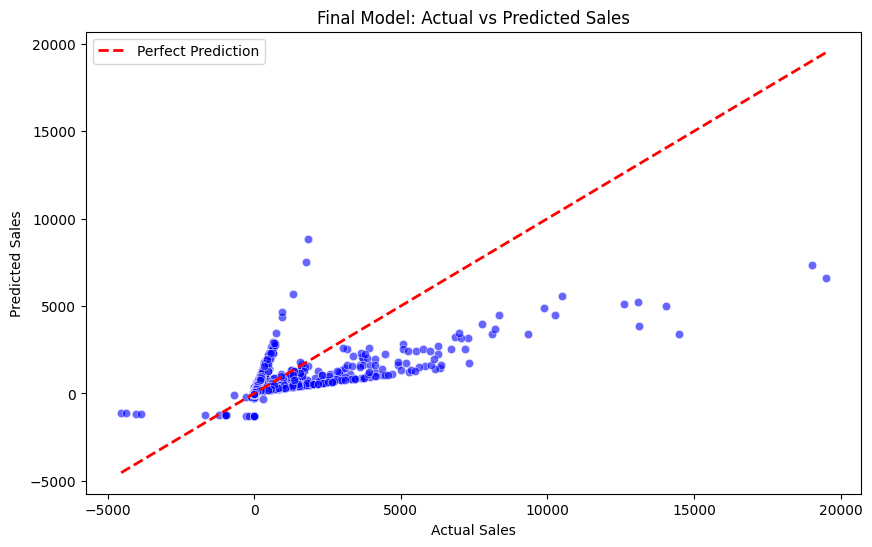

In [5]:
# ==========================================
# 🚀 PART 2: MODEL BUILDING & EVALUATION
# ==========================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Define Features & Target ---
# We REMOVE 'RETAIL SALES' and 'WAREHOUSE SALES' to prevent cheating (Leakage)
y = df['Total_Sales']
X = df[['RETAIL TRANSFERS', 'Relative_Performance', 'YEAR', 'MONTH', 'Season', 'ITEM TYPE']]

# --- 2. Preprocessing (Encoding) ---
X_encoded = pd.get_dummies(X, columns=['Season', 'ITEM TYPE'], drop_first=True)

# --- 3. Split Data (80/20) ---
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# --- 4. Scaling (MinMax) ---
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 5. Train Model ---
print("\nTraining Linear Regression Model...")
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# --- 6. Evaluate ---
y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("="*40)
print(f"🏆 FINAL MODEL RESULTS")
print("="*40)
print(f"✅ R² Score: {r2:.4f} (Accuracy)")
print(f"❌ MSE Error: {mse:.4f}")
print("="*40)

# --- 7. Visualization ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.title('Final Model: Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.show()